In [41]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [42]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [44]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [45]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [46]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [49]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [51]:
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date :", query_date)

Query Date : 2016-08-23


In [52]:
# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
for record in last_year_data:
    print(record)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2016-09-08', 0.15)
('2016-09-09', 0.35)
('2016-09-10', 1.16)
('2016-09-11', 0.6)
('2016-09-12', 1.04)
('2016-09-13', 1.2)
('2016-09-14', 6.7)
('2016-09-15', 3.35)
('2016-09-16', 0.61)
('2016-09-17', 0.23)
('2016-09-18', 0.42)
('2016-09-19', 0.25)
('2016-09-20', 0.43)
('2016-09-21', 1.02)
('2016-09-22', 0.75)
('2016-09-23', 0.33)
('2016-09-24', 0.27)
('2016-09-25', 0.04)
('2016-09-26', 1.02)
('2016-09-27', 1.0)
('2016-09-28', 0.05)
('2016-09-29', 1.49)
('2016-09-30', 0.38)
('2016-10-01', 1.02)
('2016-10-02', 0.61)
('2016-10-03', 0.46)
('2016-10-04', 3.46)
('2016-10-05', 0.81)
('2016-10-06', 0.04)
('2016-10-07', 0.01)
('2016-10-08', 0.04)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.35)
('2016-10-12', 0.02)
('2016-10-13', 0.06)
('2016-10-14', 0.0)
('2016-10-15', 0.33)
('2016-10-16', 0.0)
('2016-10-17', 0.38)
('2016-10-18', 0.48)
('2016-10-19', 0.0)
('2016-10-20', 1.0)
('2016-10-21', 0.09)
('2016-10-22', 1.37)
('2016-10-23', 0.24)
('2016-10-24', 0.7)
('2016-10-25', 0.4)
('20

In [53]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df = pd.DataFrame(last_year_data, columns=['date', 'precp'])
last_year_df.set_index(last_year_df['date'], inplace=True)


#list(last_year_df)
# Sort the dataframe by date
last_year_df = last_year_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
#print(last_year_data)

last_year_df.plot

# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number stations in the dataset
Station_total = session.query(Station.id).count()
print(f'There are {Station_total} stations available in this fateset.')

There are 9 stations available in this fateset.


In [56]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Station_id = 'USC00519281'
session.query(func.min(Measurement.tobs) ,
              func.max(Measurement.tobs) ,
              func.avg(Measurement.tobs)).filter(Measurement.station == Station_id).all()

[(54.0, 85.0, 71.66378066378067)]

In [66]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Choose the station with the highest number of temperature observations.
temp_obs_data=session.query(Measurement.tobs).filter(Measurement.station==Station_id).\
    filter(Measurement.date>=query_date).all()
temp_obs_data

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [68]:
# Create the dataframe
temp_obs_data_df = pd.DataFrame(temp_obs_data, columns=["tobs"])
temp_obs_data_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


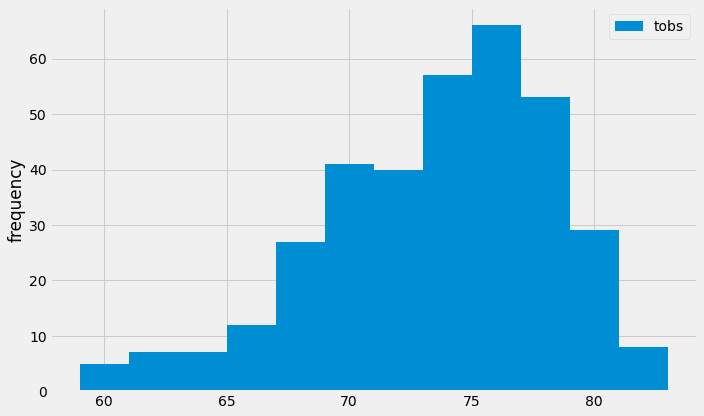

In [70]:
# Create the plot
plt.figure(figsize=(10,6))
plt.hist(temp_obs_data_df["tobs"], bins=12)
plt.ylabel("frequency")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()

#save the plot
#plt.savefig("output/frequency.png")
#plt.show()

# Close session

In [71]:
# Close Session
session.close()